**Task: Location-based Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
%matplotlib inline

In [ ]:
restaurant_data = pd.read_csv("/content/Dataset .csv")  # Replace with your actual dataset path

In [ ]:
# Check the first few rows of the dataset to ensure it's loaded correctly
print(restaurant_data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
print(restaurant_data.head())
print("\n")
print("\n")
print(restaurant_data.index)

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
print(restaurant_data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
# Check for missing values in the 'Cuisines' column
print(restaurant_data['Cuisines'].isnull().sum())

# Option 1: Fill missing values with an empty string
restaurant_data['Cuisines'] = restaurant_data['Cuisines'].fillna('')

# Now split cuisines into lists
restaurant_data['Cuisines_List'] = restaurant_data['Cuisines'].str.split(', ')

# Check if the 'Cuisines_List' column was created successfully
print(restaurant_data.columns)

# Proceed with MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(restaurant_data['Cuisines_List'])

9
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisines_List'],
      dtype='object')


In [ ]:
# Check if the DataFrame is empty
if restaurant_data.empty:
    print("The DataFrame is empty.")
else:
    print("DataFrame shape:", restaurant_data.shape)
    print("DataFrame columns:", restaurant_data.columns)

# Check for missing values
print("Missing values in each column:")
print(restaurant_data.isnull().sum())

# Check the index
print("DataFrame index:")
print(restaurant_data.index)

DataFrame shape: (9551, 22)
DataFrame columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisines_List'],
      dtype='object')
Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating

Missing Latitude: 0
Missing Longitude: 0


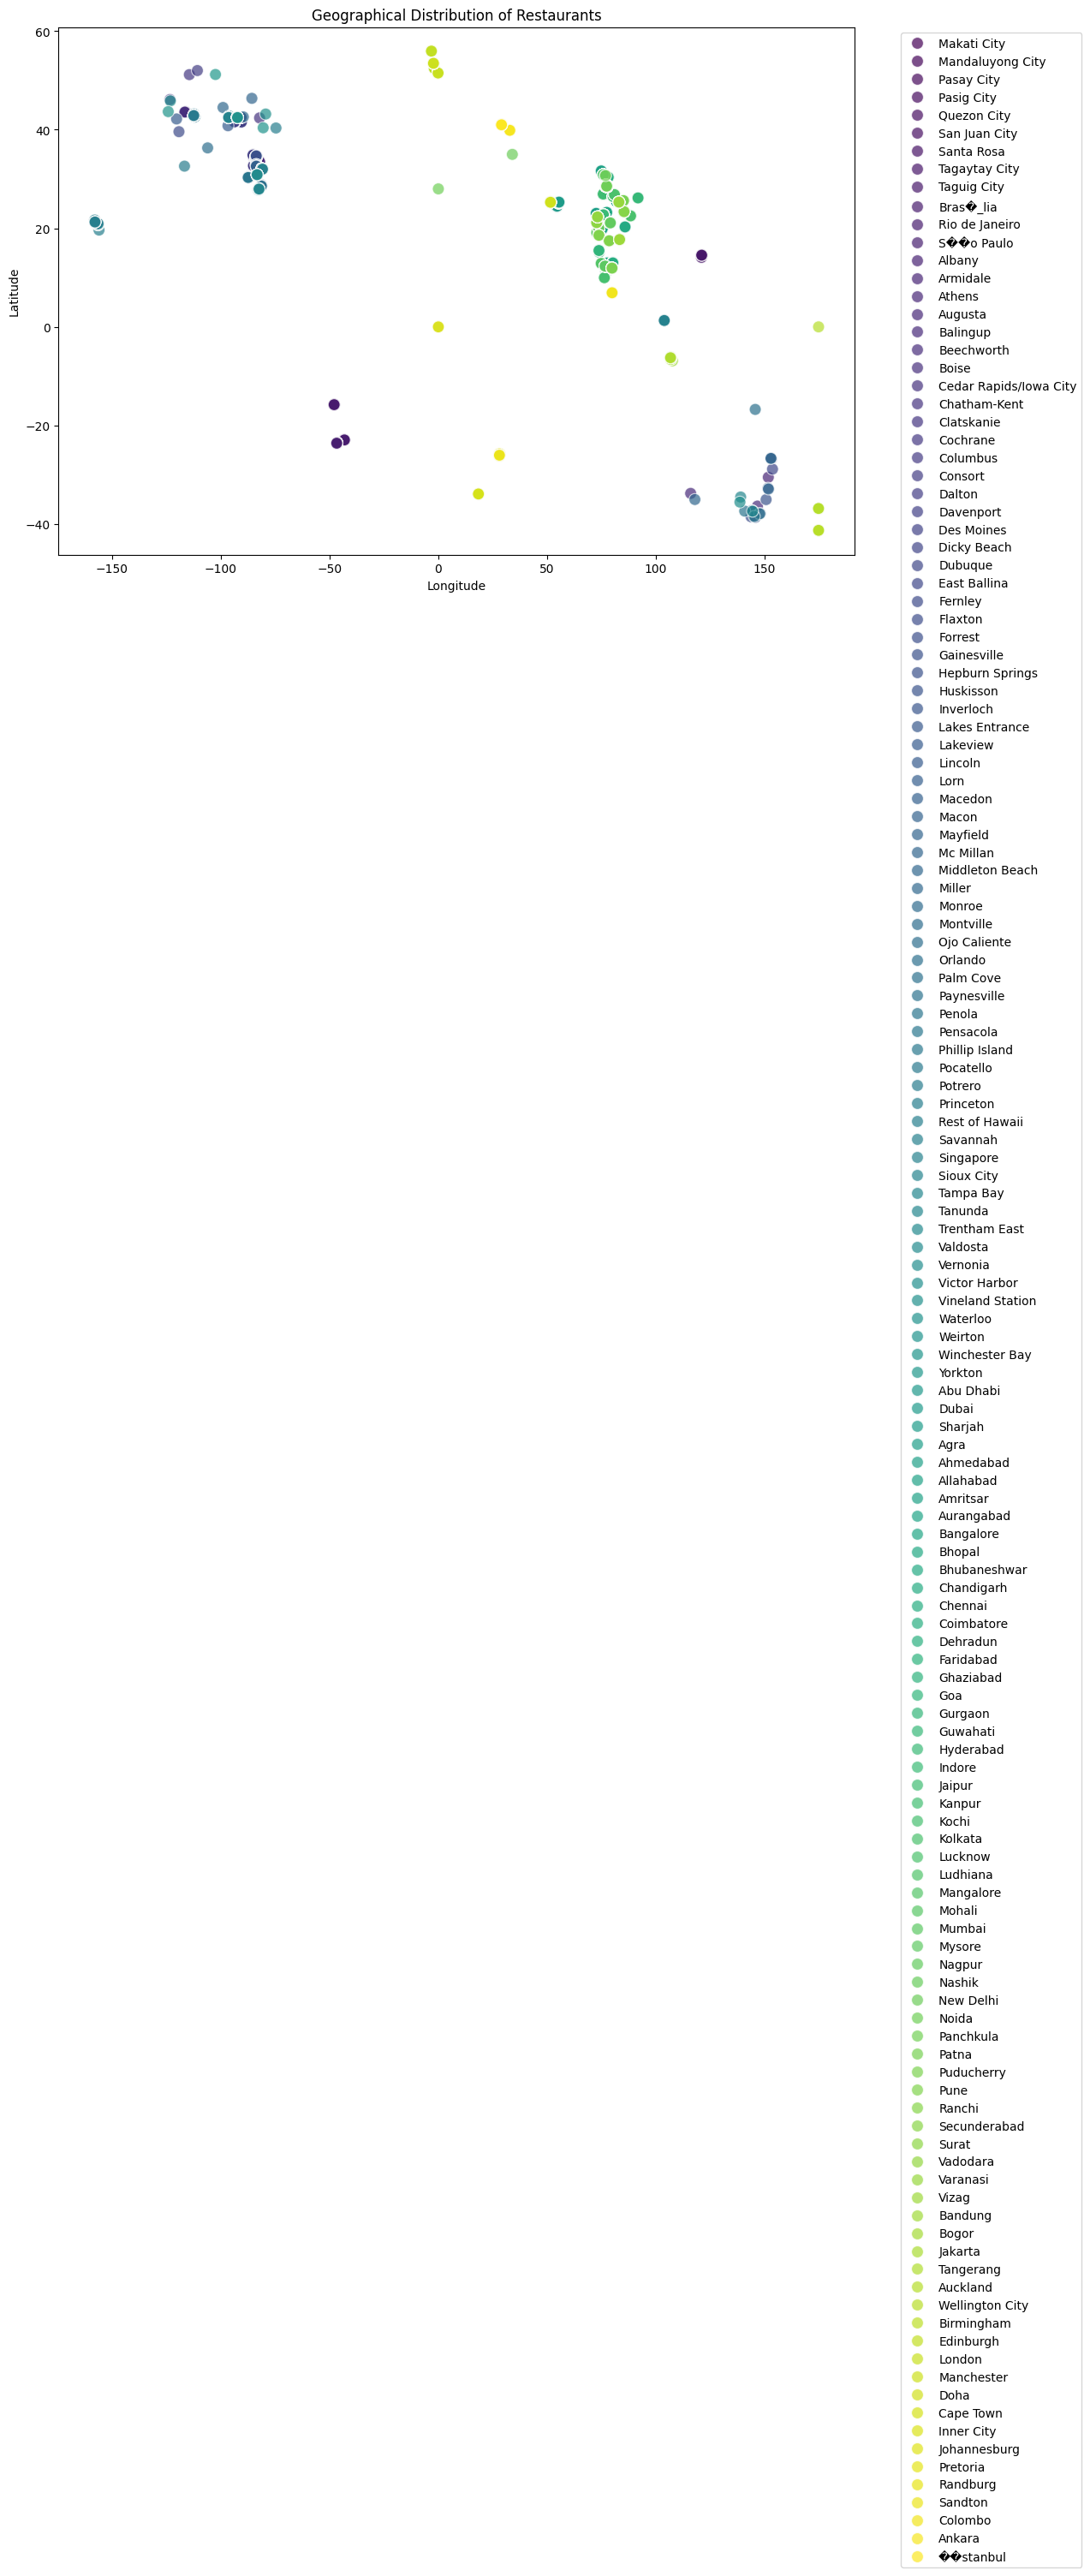

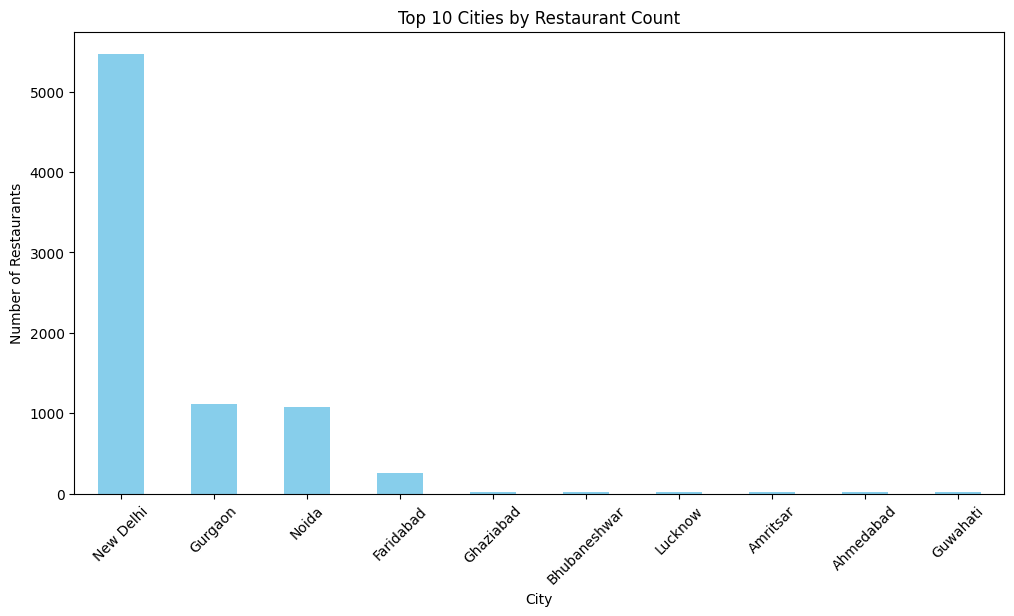


City-wise Statistics:
              Restaurant Count  Average Rating  Price range   Top Cuisine
City                                                                     
New Delhi                 5473        2.438845     1.621597  North Indian
Gurgaon                   1118        2.651431     1.855993  North Indian
Noida                     1080        2.036204     1.601852  North Indian
Faridabad                  251        1.866932     1.454183  North Indian
Ghaziabad                   25        2.852000     1.800000  North Indian
Bhubaneshwar                21        3.980952     1.857143       Chinese
Lucknow                     21        4.195238     2.571429          Cafe
Amritsar                    21        3.685714     1.809524  North Indian
Ahmedabad                   21        4.161905     2.571429   Continental
Guwahati                    21        4.190476     2.523810       Chinese

Correlation between Price Range and Rating:
                  Price range  Aggregate rat

In [ ]:
# Load the dataset (if not already loaded)
restaurant_data = restaurant_data.copy()  # Ensure the dataset is loaded correctly

# Check for missing coordinates
print("Missing Latitude:", restaurant_data['Latitude'].isna().sum())
print("Missing Longitude:", restaurant_data['Longitude'].isna().sum())

# 1. Visualize restaurant distribution on a map
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    data=restaurant_data,
    hue='City',  # Color by city
    palette='viridis',
    alpha=0.7,
    s=100
)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Group by city and analyze concentration
city_stats = restaurant_data.groupby('City').agg({
    'Restaurant Name': 'count',  # Number of restaurants
    'Aggregate rating': 'mean',  # Average rating
    'Price range': 'mean',       # Average price range
}).rename(columns={
    'Restaurant Name': 'Restaurant Count',
    'Aggregate rating': 'Average Rating'
}).sort_values('Restaurant Count', ascending=False)

# Plot top cities by restaurant count
plt.figure(figsize=(12, 6))
city_stats['Restaurant Count'].head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Restaurant Count')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# 3. Calculate statistics by city
# Add most common cuisine per city
def get_top_cuisine(cuisines):
    if cuisines.empty:
        return None  # or return a default value like 'Unknown'
    return cuisines.str.split(', ').explode().mode()[0]

city_stats['Top Cuisine'] = restaurant_data.groupby('City')['Cuisines'].apply(get_top_cuisine)

print("\nCity-wise Statistics:")
print(city_stats.head(10))

# 4. Identify insights and patterns
# Insight 1: Correlation between price range and rating
correlation = restaurant_data[['Price range', 'Aggregate rating']].corr()
print("\nCorrelation between Price Range and Rating:")
print(correlation)

# Insight 2: Top rated cities
top_rated_cities = city_stats.sort_values('Average Rating', ascending=False).head(5)
print("\nTop 5 Cities by Average Rating:")
print(top_rated_cities[['Average Rating', 'Top Cuisine']])

# Insight 3: Most expensive cities
pricey_cities = city_stats.sort_values('Price range', ascending=False).head(5)
print("\nTop 5 Most Expensive Cities:")
print(pricey_cities[['Price range', 'Top Cuisine']])